# 3-1 선형 회귀, 데이터 준비

## 선형 회귀

$$y = ax + b$$
기울기(slope): a
절편(intercept): b

`선형 회귀`는 기월기와 절편을 찾아내는 것이다.

## 데이터 준비

In [1]:
# 데이터 가져오기
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [2]:
# 데이터 셋의 크기 확인
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [3]:
# 입력 데이터 자세히 보기
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [4]:
# 타깃 데이터 자세히 보기
diabetes.target[:3]

array([151.,  75., 141.])

### 데이터 시각화

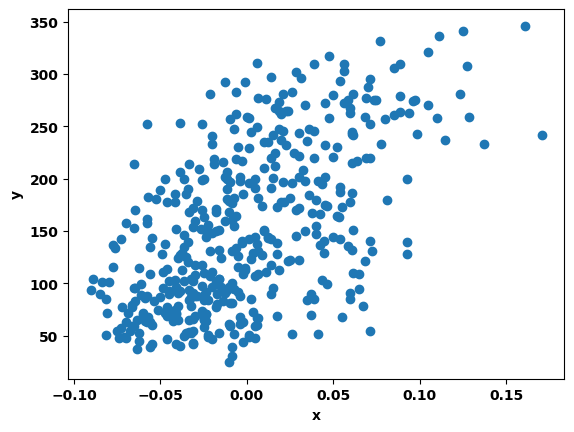

In [5]:
# matplotlib scatter() 산점도 함수
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:, 2], diabetes.target) # 3번째 특성 이용
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
# 훈련 데이터 저장
x = diabetes.data[:, 2]
y = diabetes.target

# 3-2 경사 하강법

$$\hat{y} = wx+b$$
가중치: w
절편: b

In [7]:
# w와 b 초기화
w = 1.0
b = 1.0

In [10]:
# 첫 샘플로 y-hat 얻기
y_hat = x[0] * w+ b
print(y_hat)
# 타깃과 예측 데이터 비교
print(y[0])

1.0616962065186886
151.0


In [12]:
# w값을 조절해서 y_hat 변화량 관찰
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0678658271705574


In [13]:
# w 값 조정 후 예측값 증가 정도 확인
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.061696206518688734


In [14]:
# 변화율로 가중치 업데이트
w_new = w + w_rate
print(w_new)

1.0616962065186888


In [15]:
# 변화율로 절편 업데이트
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)


1.1616962065186887
1.0


In [ ]:
b_new = b + 1
print(b_new)

2.0


### 오차 역전파로 가중치와 절편 업데이트


In [17]:
# 오차와 변화율을 곱하여 가중치 업데이트
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555904514 150.9383037934813


In [20]:
# 두 번째 샘플을 사용해 오차를 구하고 새로운 w와 b 업데이트
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)


17.993468222704664 75.92672488561789


In [21]:
# 전체 샘플에 대해 위 과정 반복
for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)

587.8654539985689 99.40935564531424


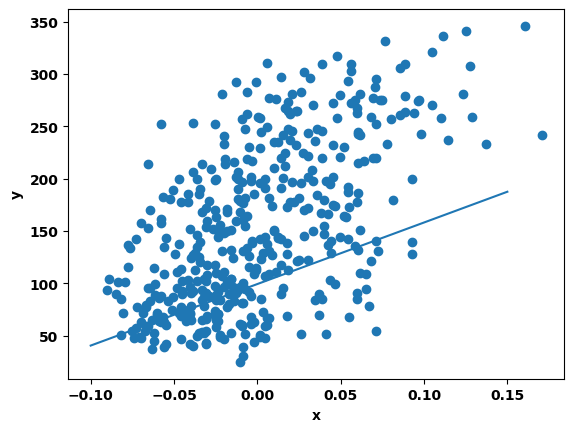

In [22]:
# 위 과정에서 얻어낸 모델 그래프 그리기
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [24]:
# 여러 에포크 반복
# 에포크: 전체 훈련 데이터를 모두 이용하여 한 단위의 작업을 진행하는 것
for i in range(1, 100):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err
print(w, b)

913.5973364345905 123.39414383177204


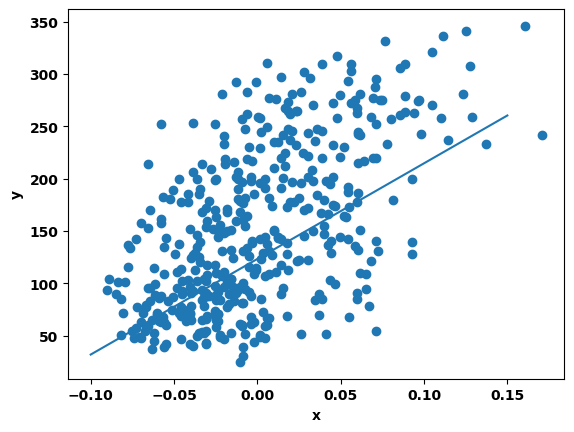

In [25]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [26]:
# 모델로 예측하기
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

287.8416643899983


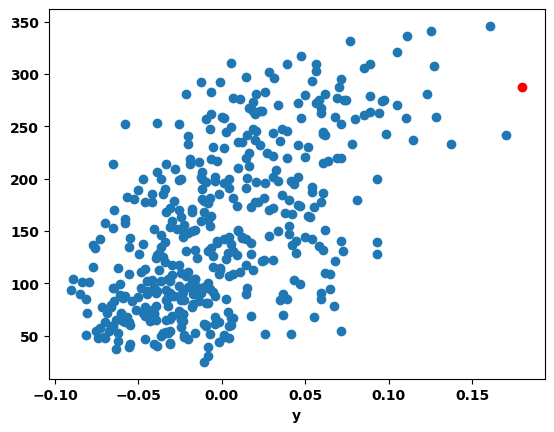

In [28]:
plt.scatter(x, y)
plt.scatter(x_new, y_pred, c='r')
plt.xlabel('x')
plt.xlabel('y')
plt.show()